**Exploratory Data Analysis of Bank Customer Churn**

Euro Bank, A Leading European Bank has noticed increased number of customers leaving the bank. To tackle this alarming situation, Bank has decided to engage the services of our company to do an Exploratory data analysis and present the findings. 6 Months of Data pertaining to close to 10000 customers are selected randomly across three countries - France, Germany , Spain and has been shared. The bank wants to understand and get the insights and patterns around customer churning so that they can devise / adapt new policies and change existing processes if required



In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the Data from the file and browsing top records to check whether data is loaded correctly

In [5]:
#Load the CSV file and browse few records
df = pd.read_csv("Churn_Data.csv")
df.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,FR,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,FR,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,FR,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,DE,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


Exploratory Data Analysis Begins 

In [6]:
# Checking type of df object - Should be a Pandas DataFrame
type(df)

pandas.core.frame.DataFrame

In [7]:
# using shape attribute of Pandas to check the number of rows & number of columns in the dataset
df.shape

(10015, 14)

In [5]:
#Using describe nethod to check the statistical values of the columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10015.000000,1.001500e+04,10015.000000,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,5007.976535,1.569087e+07,650.599401,38.921518,5.013679,76478.34897,1.529905,0.705542,0.514928,100060.654406,0.203994
std,2891.185299,7.193888e+04,96.678524,10.483500,2.891886,62382.47190,0.581555,0.455822,0.499802,57497.569906,0.402985
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2504.500000,1.562832e+07,584.000000,32.000000,3.000000,0.00000,1.000000,0.000000,0.000000,50973.585000,0.000000
50%,5008.000000,1.569068e+07,652.000000,37.000000,5.000000,97092.87000,1.000000,1.000000,1.000000,100137.700000,0.000000
75%,7511.500000,1.575319e+07,718.000000,44.000000,7.000000,127646.04000,2.000000,1.000000,1.000000,149370.170000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.09000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
#Using info method to get the information on the dataframe including the index data type and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10015 non-null  int64  
 1   CustomerId       10015 non-null  int64  
 2   Surname          10015 non-null  object 
 3   CreditScore      10015 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10015 non-null  int64  
 7   Tenure           10015 non-null  int64  
 8   Balance          10015 non-null  float64
 9   NumOfProducts    10015 non-null  int64  
 10  HasCrCard        10015 non-null  int64  
 11  IsActiveMember   10015 non-null  int64  
 12  EstimatedSalary  10015 non-null  float64
 13  Exited           10015 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# Checking for any null values in the dataset
null_counts = df.isnull().sum()
null_counts
null_counts[null_counts > 0]


Geography    15
Gender       15
dtype: int64

In [11]:
#Checking the count of values for the disinct Geographies and Genders - Exploring the Data
df.Geography.value_counts()
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
#Handling null values
df["Geography"].fillna("No Country", inplace = True)
df["Gender"].fillna("Missing", inplace = True)

In [13]:
# Checking for any null values in the dataset
null_counts = df.isnull().sum()
null_counts
null_counts[null_counts > 0]

Series([], dtype: int64)

In [14]:
# Checking null_count to see if there is still any column with null values
null_counts

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Deduplication - Checking for & removing any duplicate records in the data set based on the columns - RowNumber and CustomerId

In [17]:
# Checking for Duplicate records - Dedulplication
DuplicateRows = df[df.duplicated(['RowNumber','CustomerId'])]
DuplicateRows
DuplicateRows.shape

(15, 14)

In [13]:
df.shape

(10015, 14)

In [18]:
#Deleting Duplicate records
df.drop_duplicates(subset = ["RowNumber","CustomerId"])
df = df.drop_duplicates(subset=['RowNumber','CustomerId'], keep='first')                     

In [19]:
df.shape

(10000, 14)

In [20]:
df.duplicated().any()

False

The dataset has the columns RowNumber, CustomerId and Surname which will not have any impact on the customer leaving the bank. We can drop these from the analysis

In [21]:
# Dropping columns not required for Amnalysis - Reducing the features
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [22]:
# Reviewing the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,FR,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,FR,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,FR,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Based on the remaining variables, Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember are categorical variables and the remaining variables i.e. CreditScore, Age, Tenure, Balance and EstimantedSalary are numerical variables.

In [19]:
# Checking unique values of Geography Column
countries = df.Geography.unique()
countries

array(['FR', 'Spain', 'DE', 'Germany', 'France'], dtype=object)

In [23]:
# Checking # of records per unique Geography
df.Geography.value_counts()

France     4976
Germany    2478
Spain      2477
FR           38
DE           31
Name: Geography, dtype: int64

Data Cleansing - Inconsistent values for the Same Country - "France" and "FR", "Germany & DE"
Since Country values are captured at different locations and through different systems, some have the full name 
while some have captured the 2-letter ISO / Alpha code. We can update all "FR" values to "France" 
and all "DE" values to "Germany"


In [24]:
# Data Cleansing - Standardising Inconsitent Values for France & Germany in the Dataset
df['Geography'] = df['Geography'].replace(['FR'],'France')
df['Geography'] = df['Geography'].replace(['DE'],'Germany')

In [25]:
# Re-checking the Gepgraphy column to ensure the values are standardised
countries = df.Geography.unique()
countries

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
# Re-checking the count
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Analyzing the Customer Churn - Checking the total number of Exited & NonExited Customers

In [26]:
# Capturing the Total count of Exited customers
totalExited = len(df.loc[df.Exited == 1])
totalExited

2037

In [27]:
# Capturing the Total count of NonExited customers
totalNonExited = len(df.loc[df.Exited == 0])
totalNonExited

7963

Writing a Function to calculate the Geography Wise Churn Ratio

In [27]:
# Function to determine the Geograohy Wise Churn Ratio. Takes GeographyName & DataFrame as input and returns churn ratio ((Totalexited per country / TotalPeople)*100
def findGeographyWiseChurnRatio(GeographyName,df):
    
    totalPeople= len(df.loc[df.Geography == GeographyName])
    totalExitedPerCountry = len(df.loc[(df.Exited == 1) & (df.Geography == GeographyName)])
    return((totalExitedPerCountry/totalPeople)*100)

In [28]:
# Checking the function with France as an example
findGeographyWiseChurnRatio('France',df)

16.15476665337056

In [30]:
# Executing the function for all values of countries - Loop construct
churnPercentageByGeography =  {x:np.round(findGeographyWiseChurnRatio(x,df)) for x in countries}

In [31]:
# checking the churn values
churnPercentageByGeography

{'France': 16.0, 'Spain': 17.0, 'Germany': 32.0}

------- End of Data cleansing & Analysis------------

In [ ]:
Exploratory Data / Trend  Analysis by Visualization begings - Using different plots. 
Here our main interest is to get an understanding as to how the given attributes relate to the Churn.

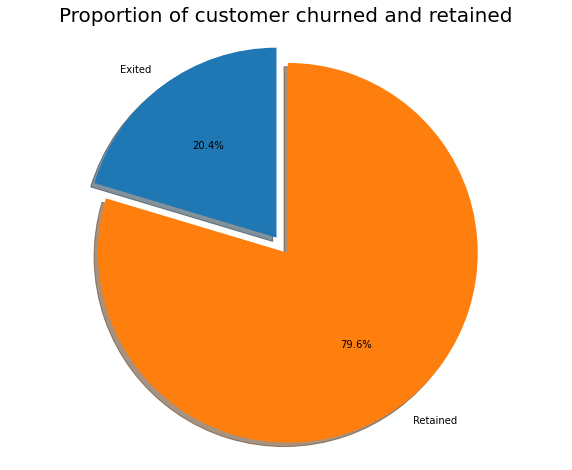

In [29]:
#Using Pie Chart to depict the exited and retained customers Pie.
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned based on 6 months of data. This is a significant number and need to further explore to understand any patterns

<<<<--- Analysis of Categorical Variables based on Plots--->>>>

In [33]:
# Setting aesthetic style of the plots - White Grid

sns.set_style("whitegrid")

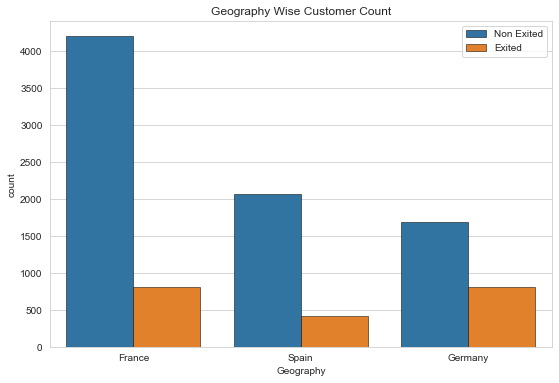

In [34]:
# we start reviewing the 'status' relation with Categorical Variables - Geography, Gneder, Is Active Member & Has Cr Card
# here we are going to plot the Country wise # of customers that have Exited and Non Exited - Geography
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Geography',
                 hue = 'Exited', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Geography Wise Customer Count')
plt.legend(['Non Exited','Exited'])
plt.show()


Observation 1:  
Gepgrapaphy Wise # of Customers Vs Churn (Exited / Non-Exited)
Above Countplot shows the count of customers present in each country and customer churned from the same country. 
Here we can notice France and Germany has maximum number of customers as compared to Spain. But the maximum number of customers Exited are from Germany.
Potential reasons for higher churn in Germany could be 

a) More banks with better strategies and competitive market 
b) Bank is focusing on other Geographies due to some reasons
c) Current service levels / schemes provided in Germany have not been visited for a while


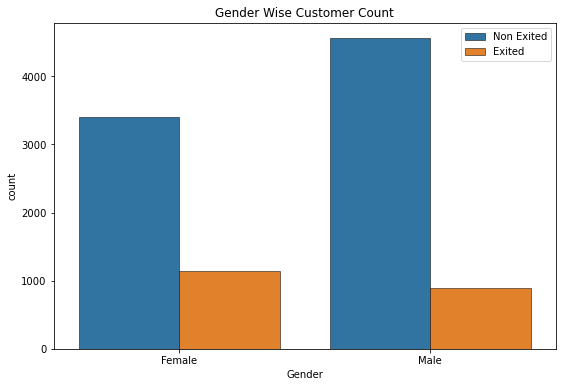

In [30]:
# we start reviewing the 'status' relation with Categorical Variables - Geography, Gender, Is Active Member & Has Cr Card
# here we are going to plot the Gender wise # of customers that have Exited and Non Exited - Gender
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Gender',
                 hue = 'Exited', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Gender Wise Customer Count')
plt.legend(['Non Exited','Exited'])
plt.show()


Observation 2: 
The proportion of female customers churning is also greater than that of male customers. This could be
a) Banks policies & schemes towards Females have become more competitive and the Bank need to visit it's policies in light of the competition

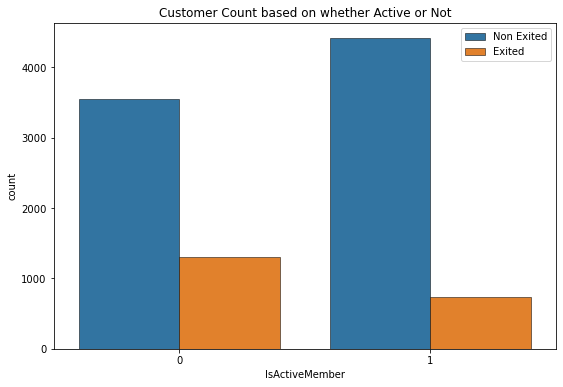

In [31]:
# we start reviewing the 'status' relation with Categorical Variables - Geography, Gender, Is Active Member & Has Cr Card
# here we are going to plot the Gender wise # of customers that have Exited and Non Exited - Is Active Member
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'IsActiveMember',
                 hue = 'Exited', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Customer Count based on whether Active or Not')
plt.legend(['Non Exited','Exited'])
plt.show()

Observation 3: 
As expected the inactive members have a greater churn. 
Observation is overall portion of the inactive members is quite high. This is worrying and indicates that
Bank might have to devise a new or upgrade existing Schemes / Programs implemented in this area to turn this group to active customers.
This could have a positive impact on the Customer Churn


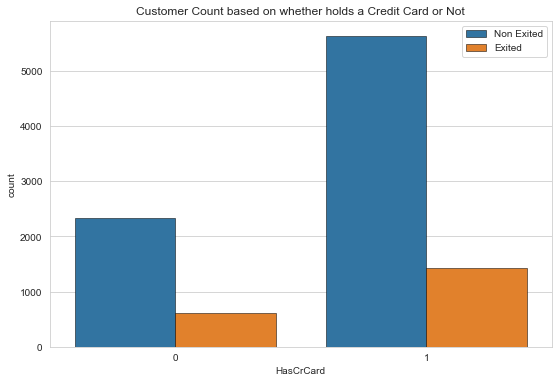

In [37]:
# we start reviewing the 'status' relation with Categorical Variables - Geography, Gender, Is Active Member & Has Cr Card
# here we are going to plot the Gender wise # of customers that have Exited and Non Exited - Has Credit Card
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'HasCrCard',
                 hue = 'Exited', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Customer Count based on whether holds a Credit Card or Not')
plt.legend(['Non Exited','Exited'])
plt.show()

Observation 4: 
Interestingly, majority of the customers that churned are those with credit cards. 
Given that majority of the customers have credit cards could prove this to be just a coincidence or
It's possible that the Credit Card promotions / offerings pertaining to the Bank is very good compared to contributors 
and hence people are just availaing that facility

<<<<-- Completed Analysis of Categorical Variables --->>>>

<<<<---Started Analysis of Continuous Variables--->>>>

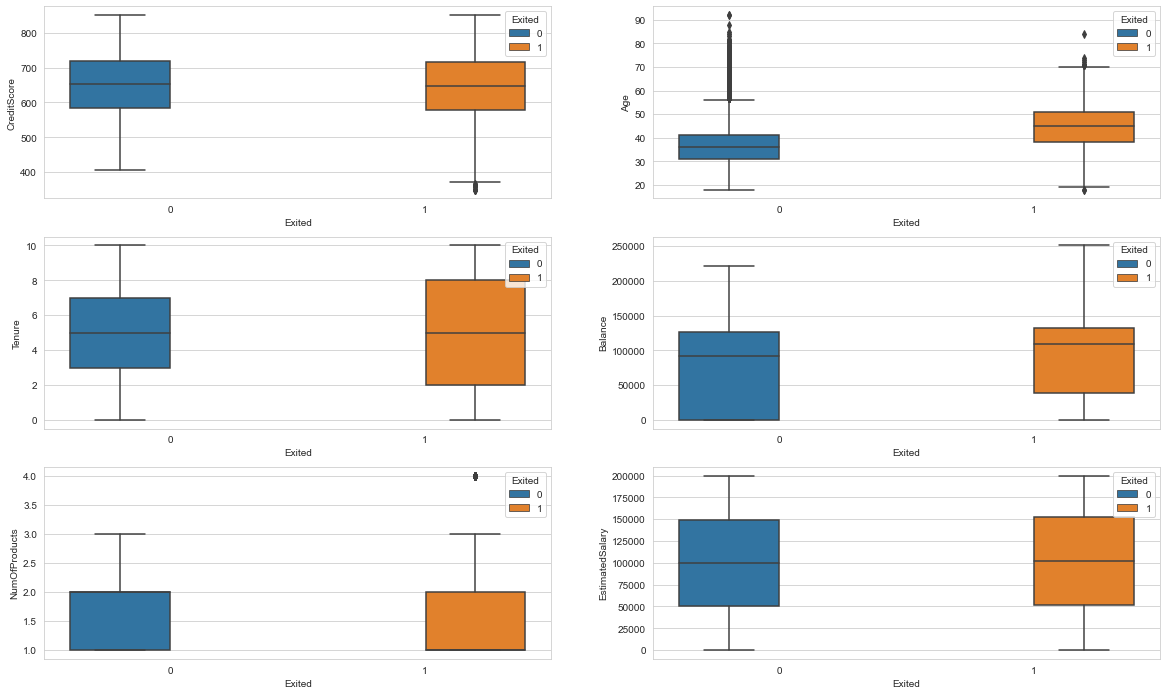

In [38]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

Observation 5: Credit Score Vs Churn - Credit Score of both exited and non exited customers seems to be more or less same. No significant difference.
Can try another plot to see if could be any observations.

Observation 6: Age Vs Churn - older customers are churning more than the younger ones 
alluding to a potential difference in service preference in the age categories. 
The bank may need to review their target market as well as review the existing strategy for retention 
between the different age groups so as to be competitive. (Incentivise)


Observation 7: Tenure Vs Churn - Customers at either end (spent little time with the bank or a lot of time with the bank) 
are more likely to churn compared to those that are of average tenure.
The bank might need to review it's promotions / offers for the lower tenure customers as well as the higher tenure customers 
so as to retain them in light of the competition.(Bring in newer schemes, Incentives & loyalty programs based on customer tenure.)
 

Observation 8: Balance Vs Churn - Worryingly, the bank is losing customers with significant bank balances 
which is likely to hit their available capital for lending. 
The bank might have to revisit their interest rate policies based on balances as well as the other instruments like FD etc 
that can be made more attractive & flexible with increasing customer balance manintained so that customers can be retained
 

Observation 9: The Number of Products & Salary does not seem to impact the churn based on the data available. 
However, based on market intelligence, 
a) Holding to more products could indicate longer tenure with the bank, Increased Investments and thereby higher balance etc. 
b) Higher Salary could mean some privileged services & products could be made available.
More data is required in this area to draw a conclusion.

Text(0.5, 1.0, 'Age Wise Balance Distribution')

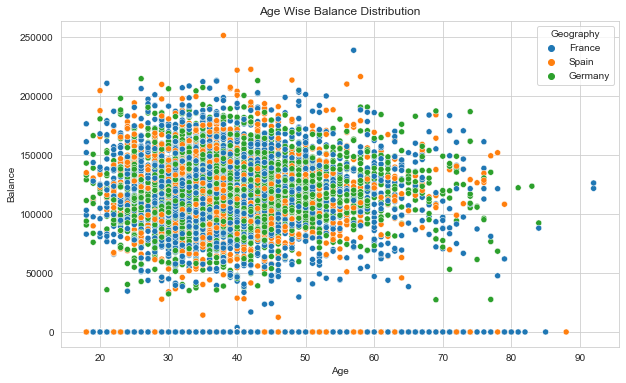

In [39]:
# Scatter Plot to determine the age wise account balance based on the data set received.
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Balance",hue = 'Geography',data=df,)
plt.title('Age Wise Balance Distribution')

Observation 10: Invalidates Hypothesis. 
For the above Graph,
we are plotting scatter plot which shows “Balance of customer” according to “Age of customer”. But after plotting here we can understand their isn't any correlation between Balance and Age in  customer because points are scattered all over the graph. 
We can observe here one interesting fact that France and Spain has Accounts with 0 balance amount. This is really ironic because Germany has maximum number of churned customers. 
<<<So this observation invalidates the hypothesis that customers with 0 account balance are most likely to leave the bank.>>>


<<<---Few additional type of plots to further analyze / re-confirm some of the above observations--->>>

In [40]:
def distribution(category):
    NonExited=df[df.Exited == 0][category]
    Exited=df[df.Exited == 1][category]
    plt.figure(figsize=(10,6))
    sns.set()
    plt.hist(NonExited,alpha=0.75,bins = 50,label = 'Not Exited',color = "blue",weights=np.ones(len(NonExited)) / len(NonExited))
    plt.hist(Exited,alpha=0.70,bins = 50,label = 'Exited',color = "red", weights=np.ones(len(Exited)) / len(Exited))
    plt.xlabel(category)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.title('{} Distribution'.format(category))
    plt.show()

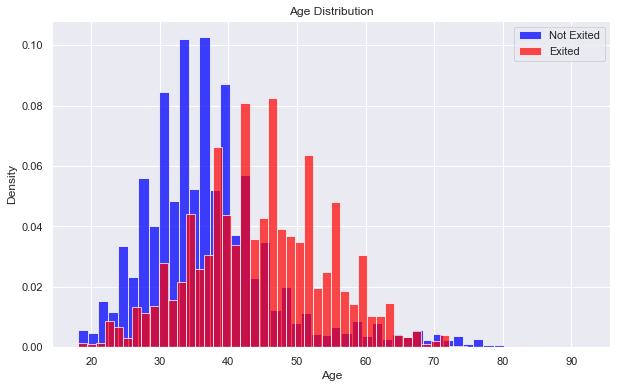

In [41]:
distribution('Age')

Observation 6: Age Vs Churn 
The above histogram shows the age distribution according to the customer who stayed and left the bank. 
- The number of customers in the bank decrease as the age increases alluding to a potential difference in service preference in the age categories.
- After the age of 40 there is an increase in the rate of customers leaving the bank. The reason for this may be that other competitor banks offer better incentives.

Recommendation
- The bank may need to review their target market as well as review the existing strategy for retention between the different age groups so as to be competitive. (Incentivise)

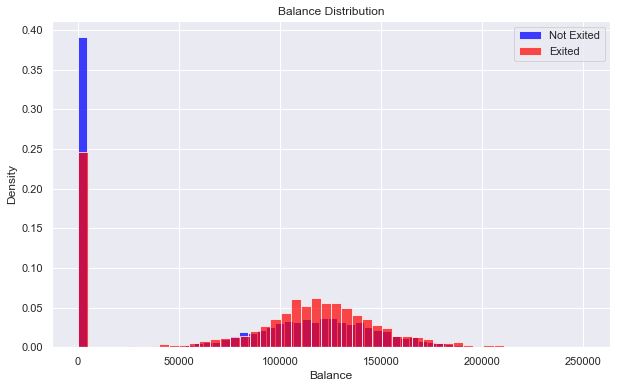

In [42]:
distribution('Balance')

In the plot above we can see that the distribution of balance for the customers who left is normal. 
Also, for the customers with 0 bank balance there is a hike in density- 24% for the customers who left and 39% for the customers who stayed.


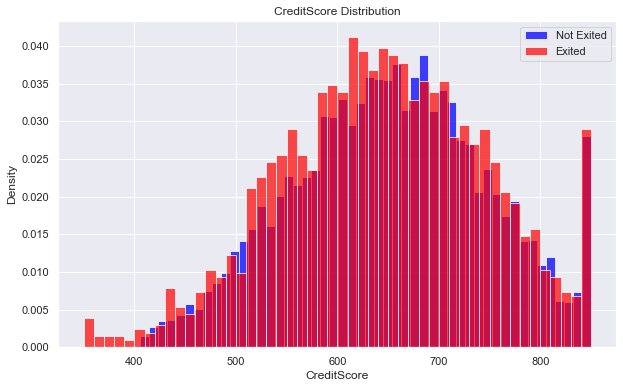

In [43]:
distribution('CreditScore')

Observation 5a: 
We wanted to check is any relation between CreditScore and customer stayed or leaving the bank. In order to that we plot CreditScore distribution using same function distribution(‘CreditScore’). 
Though based on the box plot and histogram, the scores appear more or less same, there seems to be a clear pattern that customers with Credit Score < 400 are churning


In [46]:
x1 = list(df[df.Geography == 'France']['Balance'])
x2 = list(df[df.Geography == 'Germany']['Balance'])
x3 = list(df[df.Geography == 'Spain']['Balance'])

Text(0.5, 1.0, 'Balance distribution by country')

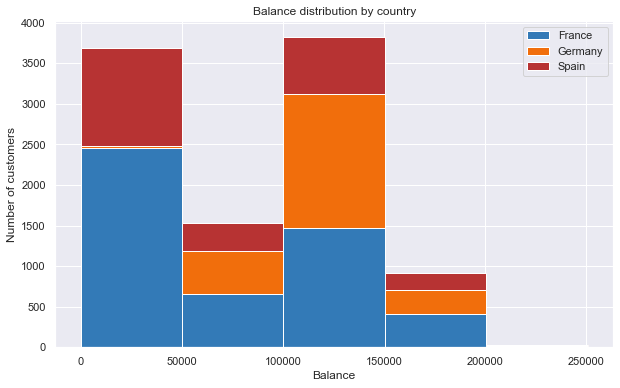

In [47]:
sns.set()
plt.figure(figsize=(10,6))
plt.hist([x1,x2,x3],bins = 5,stacked=True,color = ['#337ab7','#f16e0c','#b73333'],)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend(['France','Germany','Spain'])
plt.title('Balance distribution by country')

Observations 1a & 10a

The plot above shows the Balance of customers of different countries. 

In the first bar you notice, It contains the customers who have a balance between (0 - 50000). France has the highest number of customers and then comes Spain and Germany has very less customers in this segment. 

In the third bar, you notice Germany (100000 - 150000) has the maximum number of customers. 

Based on the above plot we can conclude that the accounts from Germany are very rich as compared to the other two countries. But if you see Plot 1 then you’ll understand the maximum number of customers leaving the bank are from Germany.


<<<On this note, we can infer that Germany being a strong Econonmy, has multiple banks which offer better incentives to the customers as compared to the Bank being analyzed. That's why a number of customers are moving out and opting for other banks. We don't have data of other banks to compare though>>>

